## Loading the Train and Test

In [4]:
import numpy as np
import pandas as pd
import tensorflow as tf
import tensorflow.keras 
from tensorflow.keras import Sequential, layers
from tensorflow.keras.layers import Dense

In [5]:
train  = pd.read_csv("customer_churn_dataset-training-master.csv")
test  = pd.read_csv("customer_churn_dataset-testing-master.csv")

In [6]:
train

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.00,17.0,1.0
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.00,6.0,1.0
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.00,3.0,1.0
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.00,29.0,1.0
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.00,20.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
440828,449995.0,42.0,Male,54.0,15.0,1.0,3.0,Premium,Annual,716.38,8.0,0.0
440829,449996.0,25.0,Female,8.0,13.0,1.0,20.0,Premium,Annual,745.38,2.0,0.0
440830,449997.0,26.0,Male,35.0,27.0,1.0,5.0,Standard,Quarterly,977.31,9.0,0.0
440831,449998.0,28.0,Male,55.0,14.0,2.0,0.0,Standard,Quarterly,602.55,2.0,0.0


In [7]:
train.drop(columns = ['CustomerID'], inplace =True)
test.drop(columns = ['CustomerID'], inplace =True)

In [8]:
train

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.00,17.0,1.0
1,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.00,6.0,1.0
2,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.00,3.0,1.0
3,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.00,29.0,1.0
4,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.00,20.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
440828,42.0,Male,54.0,15.0,1.0,3.0,Premium,Annual,716.38,8.0,0.0
440829,25.0,Female,8.0,13.0,1.0,20.0,Premium,Annual,745.38,2.0,0.0
440830,26.0,Male,35.0,27.0,1.0,5.0,Standard,Quarterly,977.31,9.0,0.0
440831,28.0,Male,55.0,14.0,2.0,0.0,Standard,Quarterly,602.55,2.0,0.0


In [9]:
train = pd.get_dummies(train,columns= ["Gender", "Subscription Type", "Contract Length"], drop_first=True,  dtype = int)
test = pd.get_dummies(test,columns= ["Gender", "Subscription Type", "Contract Length"], drop_first =True, dtype = int)

In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(train)
X_test_scaled = scaler.transform(test)

In [11]:
X_train = train.iloc[:,:-1]
X_test = test.iloc[:,:-1]
y_train = train.iloc[:,-1]
y_test = test.iloc[:,-1]

In [12]:
X_train.shape[1]

12

## Building the Model

In [38]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.initializers import HeNormal
from tensorflow.keras.optimizers import  Adam
callback = EarlyStopping(
    min_delta = 0.001,
    monitor = "val_loss",
    patience = 3,
    mode = 'min',
    restore_best_weights = True,
    verbose = 1,
    baseline = None
)
model = Sequential()
model.add(Dense(8, activation = 'relu', name= 'Layer1',kernel_initializer = HeNormal(), input_shape =(X_train.shape[1],) ))
model.add(Dense(8, activation = 'relu', name ='layer2'))
model.add(Dense(1, activation = 'sigmoid', name ='output'))
opti = Adam(learning_rate=0.0001, clipvalue = 1.0)
model.compile(loss = "binary_crossentropy", optimizer = opti, metrics = ["accuracy"])

d:\deep_learning\.venv\lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [39]:
model.summary()

Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Layer1 (Dense)                  │ (None, 8)              │           104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer2 (Dense)                  │ (None, 8)              │            72 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 185 (740.00 B)

 Trainable params: 185 (740.00 B)

 Non-trainable params: 0 (0.00 B)

In [40]:
model.fit(X_train, y_train, epochs=10, verbose = 1, validation_split= 0.2, callbacks= [callback])

Epoch 1/10
11021/11021 ━━━━━━━━━━━━━━━━━━━━ 132s 12ms/step - accuracy: 0.6173 - loss: 1.3359 - val_accuracy: 0.4996 - val_loss: 0.7250
Epoch 2/10
  817/11021 ━━━━━━━━━━━━━━━━━━━━ 1:27 9ms/step - accuracy: 0.6204 - loss: 0.6639

KeyboardInterrupt: 

In [26]:
X_train.shape

(440833, 12)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

# Create a complex toy dataset (Moons)
X, y = make_moons(n_samples=1000, noise=0.1, random_state=42)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = Sequential()

# Input layer + 10 Hidden Layers
model.add(Dense(10, activation='sigmoid', input_dim=2))
model.add(Dense(10, activation='sigmoid'))
model.add(Dense(10, activation='sigmoid'))
model.add(Dense(10, activation='sigmoid'))
model.add(Dense(10, activation='sigmoid'))
model.add(Dense(10, activation='sigmoid'))
model.add(Dense(10, activation='sigmoid'))
model.add(Dense(10, activation='sigmoid'))
model.add(Dense(10, activation='sigmoid'))
model.add(Dense(10, activation='sigmoid'))

# Output layer
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Store initial weights of the first hidden layer
old_weights = model.layers[0].get_weights()[0]

# Train for 1 epoch to see the change
history = model.fit(X_train, y_train, epochs=1, verbose=1)

# Store new weights
new_weights = model.layers[0].get_weights()[0]

# Calculate the gradient/change
percentage_change = abs((new_weights - old_weights) / old_weights) * 100
print(f"Average change in first layer weights: {np.mean(percentage_change)}%")


d:\deep_learning\.venv\lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.5000 - loss: 0.7512
Average change in first layer weights: 0.3859439790248871%


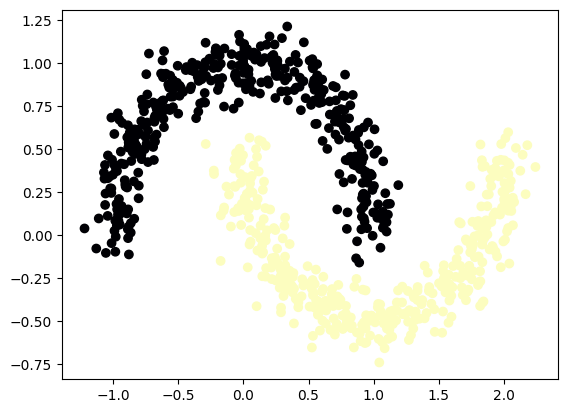

In [ ]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='magma')